<a href="https://colab.research.google.com/github/stackzero00/DatabaseCourse/blob/main/WEEK11_Lab_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sqlite3 as sl
con = sl.connect('my-test.db')

In [3]:
with con:
  con.execute("""
  create table user(
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    age INTEGER
  );
  """)

In [10]:
sql = 'INSERT INTO USER(id,name,age) values(?,?,?)'
data = [
    (1,'Alice',21),
    (2,'Bob', 22),
    (3,'Chris',23)
]

In [11]:
with con:
  con.executemany(sql,data)

In [12]:
with con:
  data = con.execute("SELECT * FROM USER WHERE age <=22")
  for row in data:
    print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [15]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id': [1,1,2,2,3,3,3],
    'skill': ['Network Security','Alogorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learing']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Alogorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learing


In [16]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
  SELECT s.user_id, u.name, u.age, s.skill
  FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
''', con)
df

,user_id,name,age,skill
0,1,Alice,21,Alogorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learing
6,3,Chris,23,Python


In [17]:
df.to_sql('USER_SKILL', con)

In [18]:
df

,user_id,name,age,skill
0,1,Alice,21,Alogorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learing
6,3,Chris,23,Python


In [22]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [23]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [24]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-09


In [25]:
%sql SELECT date('now', 'start of month', '+1 month', '-1 day');


 * sqlite:///demo.db3
Done.


"date('now', 'start of month', '+1 month', '-1 day')"
2022-11-30


In [26]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [27]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

In [28]:
def dt(days):
  return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
  timestamp = now - dt(days=(N_rows - i))
  temperature = uniform(18, 26)
  %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

In [29]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-06-27 09:36:15,25.7188458929044
2021-06-28 09:36:15,22.052225196642443
2021-06-29 09:36:15,20.792690552910535
2021-06-30 09:36:15,22.24367498718125
2021-07-01 09:36:15,24.839142204949077


In [30]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-06-27 09:36:15.389361,25.7188458929044
2021-06-28 09:36:15.389361,22.052225196642443
2021-06-29 09:36:15.389361,20.792690552910535
2021-06-30 09:36:15.389361,22.24367498718125
2021-07-01 09:36:15.389361,24.839142204949077
2021-07-02 09:36:15.389361,21.536643077494293
2021-07-03 09:36:15.389361,21.599810902648127
2021-07-04 09:36:15.389361,23.156141032101353
2021-07-05 09:36:15.389361,21.35784076368241
2021-07-06 09:36:15.389361,24.127399727511005


In [31]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-06-27 09:36:15.389361,25.7188458929044
2021-06-28 09:36:15.389361,22.052225196642443
2021-06-29 09:36:15.389361,20.792690552910535
2021-06-30 09:36:15.389361,22.24367498718125
2021-07-01 09:36:15.389361,24.839142204949077
2021-07-02 09:36:15.389361,21.536643077494293
2021-07-03 09:36:15.389361,21.599810902648127
2021-07-04 09:36:15.389361,23.156141032101353
2021-07-05 09:36:15.389361,21.35784076368241
2021-07-06 09:36:15.389361,24.127399727511005


In [32]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year,
  AVG(Temperature) AS MEAN_TMP,
  MAX(Temperature) AS MAX_TMP,
  MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,22.078685395297256,25.92021232742453,18.008602122966074
2022,21.813353446656972,25.973503854016826,18.002598894289555


In [33]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM temperature
df = ts.DataFrame()
df.set_index("date", inplace = True)
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-06-27 09:36:15', '2021-06-28 09:36:15',
               '2021-06-29 09:36:15', '2021-06-30 09:36:15',
               '2021-07-01 09:36:15', '2021-07-02 09:36:15',
               '2021-07-03 09:36:15', '2021-07-04 09:36:15',
               '2021-07-05 09:36:15', '2021-07-06 09:36:15',
               ...
               '2022-10-30 09:36:15', '2022-10-31 09:36:15',
               '2022-11-01 09:36:15', '2022-11-02 09:36:15',
               '2022-11-03 09:36:15', '2022-11-04 09:36:15',
               '2022-11-05 09:36:15', '2022-11-06 09:36:15',
               '2022-11-07 09:36:15', '2022-11-08 09:36:15'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

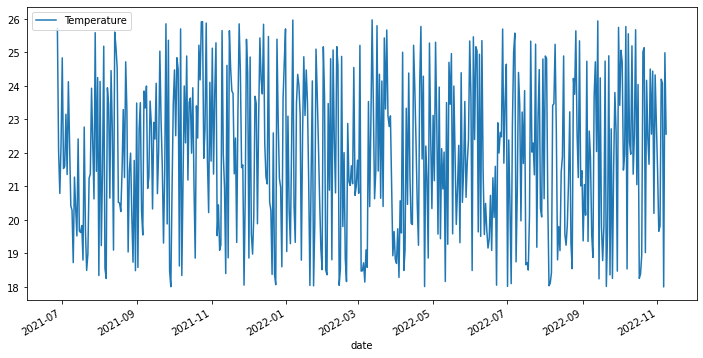

In [34]:
df.plot(figsize=(12, 6))